# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)

    # Reduce the dimensionality by selecting the top n_components
    U_train_reduced = U_train[:, :n_components]
    S_train_reduced = np.diag(S_train[:n_components])
    Vt_train_reduced = Vt_train[:n_components, :]

    # Project the training data to the reduced dimensions
    X_train_svd = np.dot(U_train_reduced, S_train_reduced)

    # For the test set, we only need to project it using the same Vt (trained components)
    X_test_svd = np.dot(X_test, Vt_train_reduced.T)

    return X_train_svd, X_test_svd
    raise NotImplementedError("Your implementation here...")

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [10,20,50,100,200,500]  # You need to decide what number to search...

# Store the results
n_components_list = []
accuracy_list = []
training_time_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    n_components_list.append(n_components)
    accuracy_list.append(accuracy)
    training_time_list.append(training_time)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8020, Training time: 1.0988 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8779, Training time: 1.7245 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 16.1213 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 58.6574 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 152.8539 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 528.4823 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


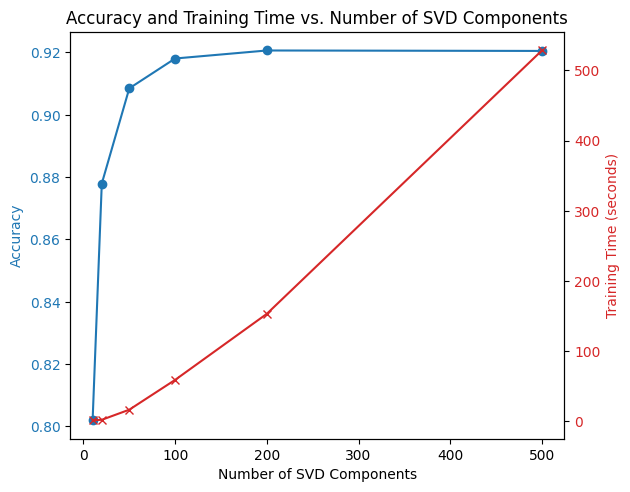

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Plot Accuracy and Training Time
fig, ax1 = plt.subplots()

# Convert 'Original' to 0 for plotting purposes
plot_n_components = [0 if comp == 'Original' else comp for comp in n_components_list]

# Plot accuracy on the left y-axis
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(plot_n_components, accuracy_list, color='tab:blue', marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for training time
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
ax2.plot(plot_n_components, training_time_list, color='tab:red', marker='x', label='Training Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Accuracy and Training Time vs. Number of SVD Components')
plt.show()


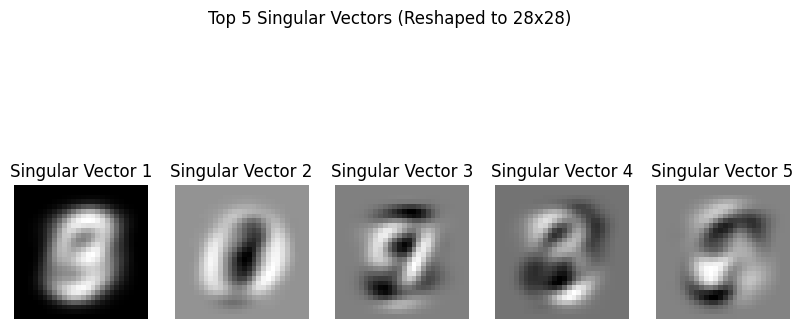

In [6]:
def plot_top_singular_vectors(Vt_train, top_n=5):
    plt.figure(figsize=(10, 5))
    for i in range(top_n):
        singular_vector = Vt_train[i, :].reshape(28, 28)  # Reshape to 28x28
        plt.subplot(1, top_n, i+1)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    plt.suptitle('Top 5 Singular Vectors (Reshaped to 28x28)')
    plt.show()

# Call the function to plot top 5 singular vectors
U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
plot_top_singular_vectors(Vt_train)


## Part 6: Analyze / Conclusion

YOUR ANSWER:

Based on the results, using around 100 SVD components provides the best balance between accuracy and efficiency. The accuracy stay around 90% after 50 components, showing that adding more components does not significantly improve performance, while the training time increases linearly with the number of components. Therefore, increasing components beyond 100 offers diminishing returns in accuracy but drastically increases computational cost. The top 5 singular vectors capture fundamental digit structures, confirming that SVD effectively reduces dimensionality without major loss of information. Thus, using around 100 components achieves optimal results by maintaining high accuracy with minimal training time.